# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3298]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3299]:
# Checking the number of mice.
mice_number = mouse_metadata["Mouse ID"].count()
mice_number

249

In [3300]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_ID_df = pd.DataFrame(mouse_data_complete,
                           columns = ['Mouse ID', 'Timepoint'])
duplicate_mice = Mouse_ID_df[Mouse_ID_df.iloc[:, [0,1]].duplicated()]['Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [3301]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_complete = mouse_data_complete[mouse_data_complete.iloc[:, [0,1]].duplicated(keep=False)]
duplicate_mice_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [3302]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_complete = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mice) == False]
clean_mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3303]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data_complete['Mouse ID'].unique().size

248

## Summary Statistics

In [3304]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_volumes_df = clean_mouse_data_complete.sort_values(by='Drug Regimen').groupby(by='Drug Regimen')['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
tumor_volumes_mean = tumor_volumes_df.mean()
tumor_volumes_median = tumor_volumes_df.median()
tumor_volumes_var = tumor_volumes_df.var()
tumor_volumes_std_dev = tumor_volumes_df.std()
tumor_volumes_std_err = tumor_volumes_df.sem()

summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": tumor_volumes_mean,
    "Median Tumor Volume": tumor_volumes_median,
    "Tumor Volume Variance": tumor_volumes_var,
    "Tumor Volume Std. Dev": tumor_volumes_std_dev,
    "Tumor Volume Std. Err.": tumor_volumes_std_err
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3305]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_adv = tumor_volumes_df.agg(['mean', 'median','var', 'std', 'sem'])
summary_statistics_adv

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: >

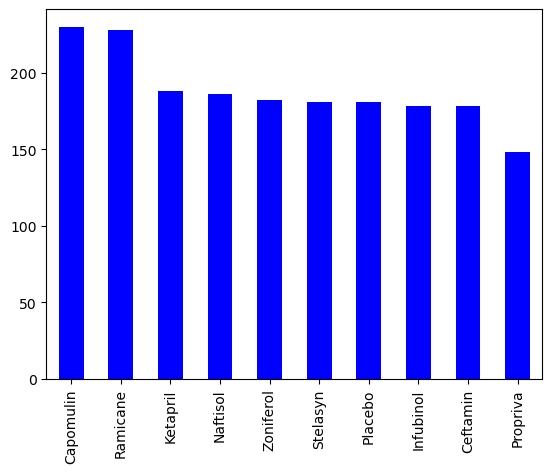

In [3306]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mouse_Timepoints_count = clean_mouse_data_complete['Drug Regimen'].value_counts()
Mouse_Timepoints_count.plot.bar(color='b')


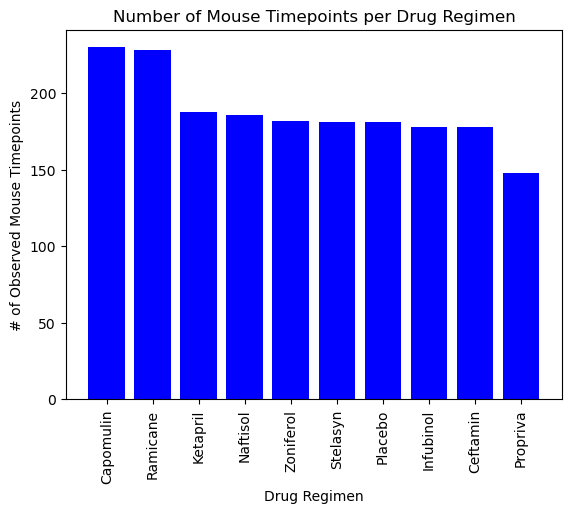

In [3307]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Mouse_Timepoints_count = clean_mouse_data_complete['Drug Regimen'].value_counts()
drug_regimen_array = Mouse_Timepoints_count.index.array

fig, ax = plt.subplots()
plt.title("Number of Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

ax.bar(drug_regimen_array, Mouse_Timepoints_count, color='blue', width=0.8)
plt.xticks(rotation=90)

plt.show()

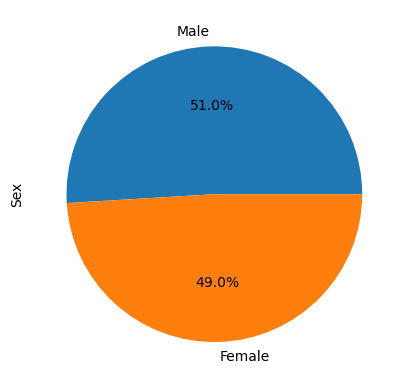

In [3308]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mouse_data_complete.sort_values(by='Sex')["Sex"].value_counts()
plot = sex_count.plot.pie(autopct='%1.1f%%')

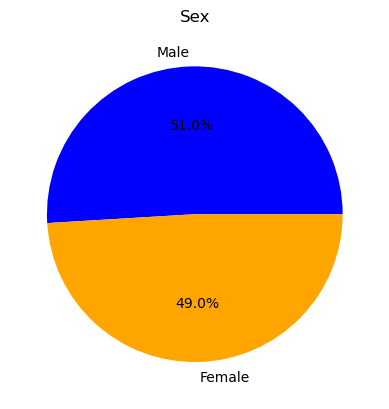

In [3309]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_mouse_data_complete.sort_values(by='Sex')["Sex"].value_counts()
labels = sex_count.index.array
colors = ["blue", "orange"]
plt.title("Sex")
plt.pie(sex_count, labels=labels, colors=colors,
        autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [3310]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_mouse_data_complete.loc[clean_mouse_data_complete["Drug Regimen"] == "Capomulin", :]
Ramicane_df = clean_mouse_data_complete.loc[clean_mouse_data_complete["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mouse_data_complete.loc[clean_mouse_data_complete["Drug Regimen"] == "Infubinol", :]
Ceftamin_df= clean_mouse_data_complete.loc[clean_mouse_data_complete["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_Capomulin = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
last_timepoint_Ramicane = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
last_timepoint_Infubinol = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
last_timepoint_Ceftamin = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_Capomulin_df = pd.DataFrame(last_timepoint_Capomulin)
merge_Capomulin = pd.merge(last_timepoint_Capomulin_df, clean_mouse_data_complete, on=("Mouse ID", "Timepoint"),how="left")

last_timepoint_Ramicane_df = pd.DataFrame(last_timepoint_Ramicane)
merge_Ramicane = pd.merge(last_timepoint_Ramicane_df, clean_mouse_data_complete, on=("Mouse ID", "Timepoint"),how="left")

last_timepoint_Infubinol_df = pd.DataFrame(last_timepoint_Infubinol)
merge_Infubinol = pd.merge(last_timepoint_Infubinol_df, clean_mouse_data_complete, on=("Mouse ID", "Timepoint"),how="left")

last_timepoint_Ceftamin_df = pd.DataFrame(last_timepoint_Ceftamin)
merge_Ceftamin = pd.merge(last_timepoint_Ceftamin_df, clean_mouse_data_complete, on=("Mouse ID", "Timepoint"),how="left")

In [3311]:
# Put treatments into a list for for loop (and later for plot labels)
list_drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)`
tumor_volume_data = []

for drug_regimen in list_drug_regimen:
    tumor_volumes = []
    if (drug_regimen == 'Capomulin'):
        tumor_volumes = merge_Capomulin['Tumor Volume (mm3)']
    elif (drug_regimen == 'Ramicane'):
        tumor_volumes = merge_Ramicane['Tumor Volume (mm3)']
    elif (drug_regimen == 'Infubinol'):
        tumor_volumes = merge_Infubinol['Tumor Volume (mm3)']
    elif (drug_regimen == 'Ceftamin'):
        tumor_volumes = merge_Ceftamin['Tumor Volume (mm3)']
        
    tumor_volume_data.append(tumor_volumes)
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quantile = quartiles[0.25]
    upper_quantile = quartiles[0.75]

    iqr = upper_quantile - lower_quantile
    print(f"{drug_regimen} Lower quantile: {lower_quantile}")
    print(f"{drug_regimen} Upper quantile: {upper_quantile}")
    print(f"{drug_regimen} IQR: {iqr}")

    lower_bound = lower_quantile - (1.5 * iqr)
    upper_bound = upper_quantile + (1.5 * iqr)

    print(f"{drug_regimen} potential outliers could be values below {lower_bound} and above {upper_quantile} could be outliers.")
    

Capomulin Lower quantile: 32.37735684
Capomulin Upper quantile: 40.1592203
Capomulin IQR: 7.781863460000004
Capomulin potential outliers could be values below 20.70456164999999 and above 40.1592203 could be outliers.
Ramicane Lower quantile: 31.56046955
Ramicane Upper quantile: 40.65900627
Ramicane IQR: 9.098536719999998
Ramicane potential outliers could be values below 17.912664470000003 and above 40.65900627 could be outliers.
Infubinol Lower quantile: 54.04860769
Infubinol Upper quantile: 65.52574285
Infubinol IQR: 11.477135160000003
Infubinol potential outliers could be values below 36.83290494999999 and above 65.52574285 could be outliers.
Ceftamin Lower quantile: 48.72207785
Ceftamin Upper quantile: 64.29983003
Ceftamin IQR: 15.577752179999997
Ceftamin potential outliers could be values below 25.355449580000002 and above 64.29983003 could be outliers.


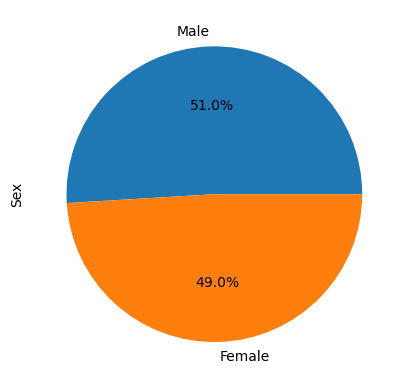

In [3312]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mouse_data_complete.sort_values(by='Sex')["Sex"].value_counts()
plot = sex_count.plot.pie(autopct='%1.1f%%')

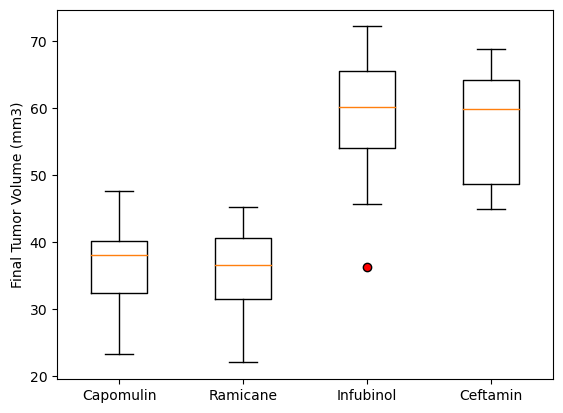

In [3313]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')

red_circle = dict(markerfacecolor='r')
ax.boxplot(tumor_volume_data, labels=list_drug_regimen, flierprops=red_circle)

plt.savefig('boxplot')
plt.show()


## Line and Scatter Plots

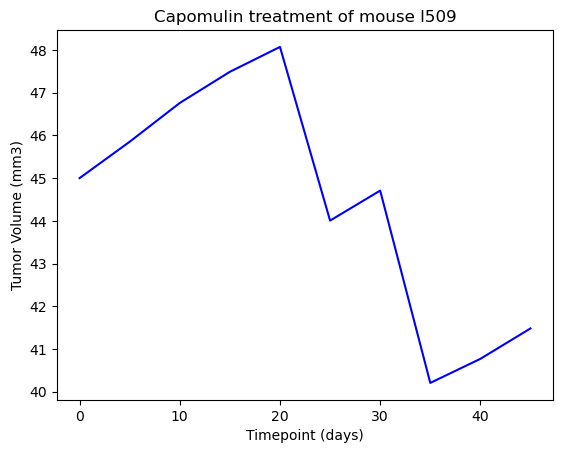

In [3314]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_data = clean_mouse_data_complete.loc[(clean_mouse_data_complete['Mouse ID'] == 'l509') & (clean_mouse_data_complete['Drug Regimen'] == 'Capomulin')]

line_graph = plt.plot(line_plot_data['Timepoint'], line_plot_data['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

C:\Users\velar\AppData\Local\Temp\ipykernel_27200\3719974635.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_data = Capomulin_df.groupby(by='Mouse ID').mean()


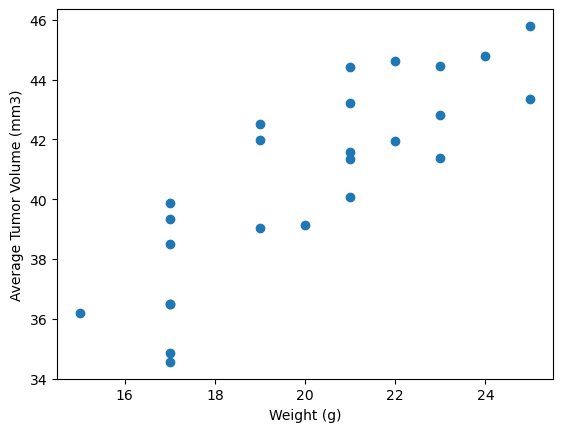

In [3315]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data = Capomulin_df.groupby(by='Mouse ID').mean()

plt.scatter(scatter_data['Weight (g)'],scatter_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

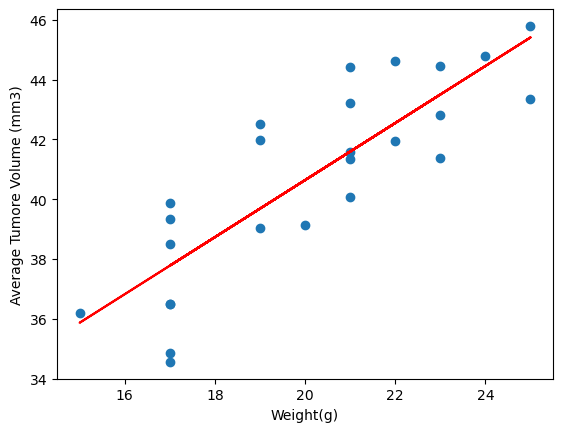

In [3316]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])[0], 2)
linear_regression = st.linregress(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
slope = linear_regression.slope
intercept = linear_regression.intercept

y_values = scatter_data['Weight (g)'] * slope + intercept
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
plt.plot(scatter_data['Weight (g)'], y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()